# Part II - 2008 Flight Performance
## by (Mukhtar Abimbola)



## Investigation Overview
The explanatory analysis focuses on flight cancellations and delays across airline flight operations in the USA for year 2008.  This presentation gives details of the proportion of fight cancelled and delayed as well as their reasons in relation to aircraft engine types.These information were presented with appropriate visualizations to enhance readability and easy reference.


## Dataset Overview

The data set contains over two million records (2,262,266) of commercial airlines operations across various airports in the USA. It consist of 37 variables associated with specific airlines operations and aircraft design parameters.Notable among these variables are:
> - Arrival and departure times.
> - Arrival and departure delays.
> - Cancellations and diversions.
> - Aircraft type and engine type, including their manufacturer and manufacture years.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from matplotlib.ticker import MultipleLocator


In [4]:
#Loading airline data set
airline_data = pd.read_csv('Airline_2008.csv')

airline_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [5]:
#Loading plane data set; this dataset contains information about each aircraft/carrier
df_plane = pd.read_csv('plane-data.csv')

df_plane.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [6]:
#Renaming some column names in the airline dataset
airline_data.rename(columns = {'DepTime':'DepartureTime', 'TailNum':'TailNum ' ,'CRSDepTime':'ScheduledDepartureTime','ArrTime':'ArrivalTime',
                               'CRSArrTime':'ScheduledArrivalTime','ArrDelay':'ArrivalDelayTime','DepDelay':'DepartureDelayTime','Dest':'Destination', 
                               'NASDelay':'National_AirSystem_Delay'}, inplace=True)


In [7]:
#Changing the Day from numbers to actual week day names

days ={1:'Monday', 2:'Tuesday',3:'Wednessday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}

airline_data['DayOfWeek'] = airline_data['DayOfWeek'].map(days).fillna(airline_data['DayOfWeek']).astype(object)

In [8]:
#Renaming cancellation codes with their meaning

cancellation_codes = {'A':'Carrier','B':'Weather','C':'National AirSystem','D':'Security','NaN':'Not Cancelled'}

airline_data['CancellationCode'] = airline_data['CancellationCode'].map(cancellation_codes).fillna(airline_data['CancellationCode']).astype(object)


In [9]:
#converting month to three letter format

airline_data['Month'] = pd.to_datetime(airline_data['Month'],format = '%m').dt.month_name().str.slice(stop=3)


In [10]:
#rename tailnum column name to match column in airline data set

df_plane.rename(columns={'tailnum':'TailNum ', 'year':'Manufacture Year'}, inplace=True)


In [11]:
df_airline_plane = pd.merge(airline_data, df_plane, on='TailNum ')

print(df_airline_plane.shape)
df_airline_plane.sample(10)


(2262266, 37)


,Year,Month,DayofMonth,DayOfWeek,DepartureTime,ScheduledDepartureTime,ArrivalTime,ScheduledArrivalTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacture Year
1340630,2008,Jan,7,Monday,2048.0,2050,2206.0,2220,EV,4908,...,NaN,NaN,Corporation,BOMBARDIER INC,11/15/2001,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
183444,2008,Jan,27,Sunday,907.0,905,1010.0,1005,WN,682,...,NaN,NaN,Corporation,BOEING,05/17/2001,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
1641472,2008,Mar,9,Sunday,829.0,820,1117.0,1035,MQ,4107,...,0.0,0.0,Corporation,EMBRAER,02/11/1999,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
1937249,2008,Mar,5,Wednessday,1242.0,1245,1435.0,1445,AA,789,...,NaN,NaN,Corporation,MCDONNELL DOUGLAS,02/04/1985,DC-9-82(MD-82),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1984
2259589,2008,Apr,17,Thursday,907.0,915,1126.0,1223,AS,5,...,NaN,NaN,Corporation,BOEING,03/20/2008,737-890,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2008
1126327,2008,Jan,3,Thursday,1131.0,1056,1245.0,1205,US,365,...,0.0,26.0,Corporation,AIRBUS INDUSTRIE,10/28/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1577232,2008,Jan,22,Tuesday,1636.0,1641,1726.0,1735,MQ,3282,...,NaN,NaN,Corporation,SAAB-SCANIA,05/29/1998,SAAB 340B,Valid,Fixed Wing Multi-Engine,Turbo-Prop,None
2000995,2008,Feb,29,Friday,2037.0,2040,2304.0,2315,AA,1832,...,NaN,NaN,Corporation,MCDONNELL DOUGLAS,07/03/1991,DC-9-82(MD-82),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
840669,2008,Mar,3,Monday,1100.0,910,1204.0,1026,OO,6752,...,0.0,0.0,Corporation,BOMBARDIER INC,10/25/2000,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2000
117364,2008,Feb,24,Sunday,1958.0,1900,2122.0,2015,WN,1286,...,0.0,58.0,Corporation,BOEING,07/11/2007,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007


In [12]:
#Combined datas set info
df_airline_plane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262266 entries, 0 to 2262265
Data columns (total 37 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   Month                     object 
 2   DayofMonth                int64  
 3   DayOfWeek                 object 
 4   DepartureTime             float64
 5   ScheduledDepartureTime    int64  
 6   ArrivalTime               float64
 7   ScheduledArrivalTime      int64  
 8   UniqueCarrier             object 
 9   FlightNum                 int64  
 10  TailNum                   object 
 11  ActualElapsedTime         float64
 12  CRSElapsedTime            float64
 13  AirTime                   float64
 14  ArrivalDelayTime          float64
 15  DepartureDelayTime        float64
 16  Origin                    object 
 17  Destination               object 
 18  Distance                  int64  
 19  TaxiIn                    float64
 20  TaxiOut                 

# **Flight Cancellations**
>- Only 2.7% of the flights movement were cancelled.
>- This constitute an insignificant number of flights movement across the airline operations.
>- They are due to Carrier, Weather, National Air System and Security reasons.

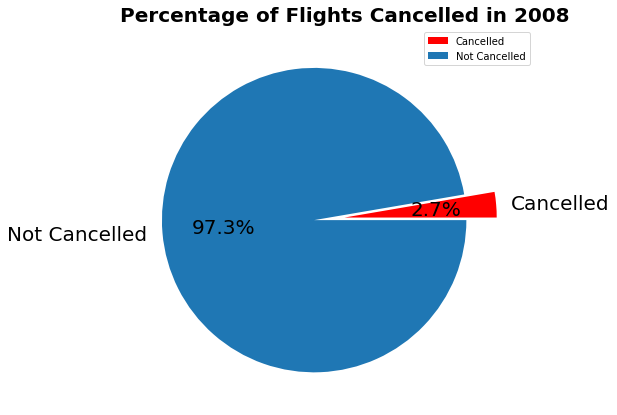

In [15]:
Flight_Cancelled = airline_data[airline_data['Cancelled']==1].count()['Cancelled']
Flight_NotCancelled = airline_data[airline_data['Cancelled']==0].count()['Cancelled']

data_plot = [Flight_Cancelled,Flight_NotCancelled]
labels = ['Cancelled','Not Cancelled']
explode = [0,0.2]
color =['r',sb.color_palette()[0]]

fig = plt.figure(figsize =(10, 7))
plt.pie(data_plot, labels=labels, colors=color, explode=explode, autopct = '%.1f%%', textprops={'fontsize': 20})
plt.legend(loc=1)
plt.title('Percentage of Flights Cancelled in 2008', fontsize=20, fontweight='bold')
plt.show();

**The bar plot below shows that:**
> - carrier contributed mostly to the numbers, with more than 26,000 cancellations
> - Security issues had no significant contributions to the flight movement cancellations.

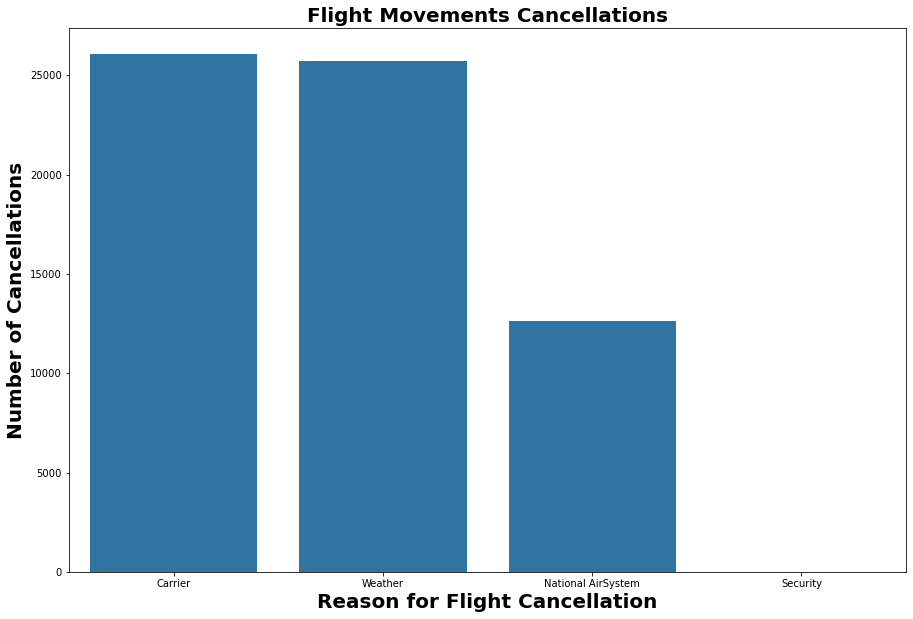

In [14]:
def chartLabels(x_label,y_label,Chart_title):
    plt.xlabel(x_label,fontsize=20, fontweight='bold')
    plt.ylabel(y_label,fontsize=20,fontweight='bold')
    plt.title(Chart_title, fontsize=20,fontweight='bold')
    
    
fig = plt.figure(figsize=(15,10))
base_color = sb.color_palette()[0]
freq = airline_data['CancellationCode'].value_counts()
order = freq.index
sb.countplot(data= airline_data, x='CancellationCode', color=base_color, order=order)
chartLabels('Reason for Flight Cancellation', 'Number of Cancellations', 'Flight Movements Cancellations')

Of all the 20 unique carriers:
> - American Airline(AA), American Eagle Airline Inc(MQ) and Skywest Airline Inc(OO) are the top 3 carriers with the highest number of cancellations across all the cancellation reasons.
> - Aloha airline(AQ), Hawaiian Airline(HA) and Frontier Airline(F9) had the least number of cancellations.

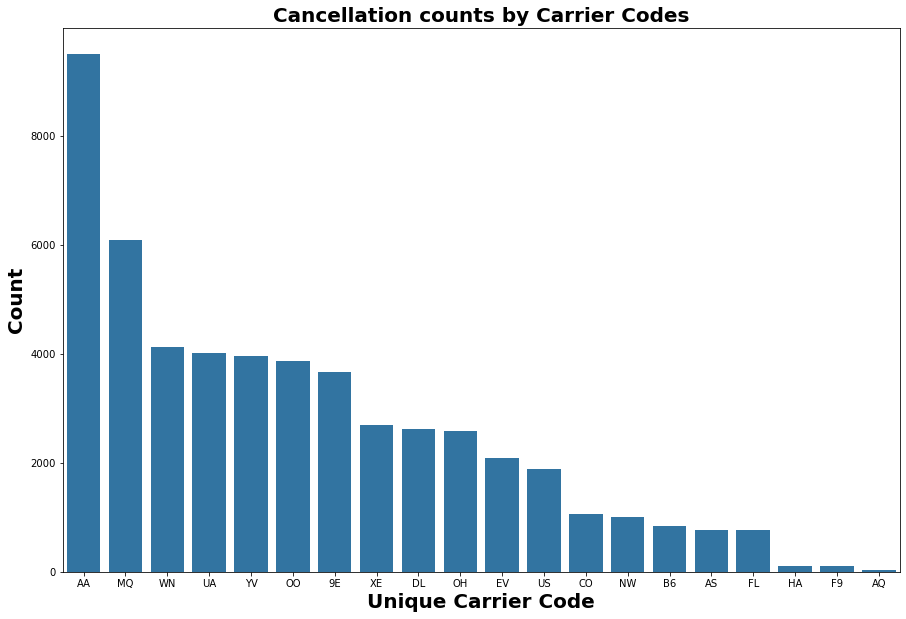

In [16]:
#getting a subset data for all flight movement with cancellations
df_cancellations = airline_data.query('CancellationCode in ["Carrier", "National_AirSystem_Delay", "Weather", "Security"]')

#Getting frequency of carrier cancellations
freq_carriers_cancellations=df_cancellations.UniqueCarrier.value_counts()
order = freq_carriers_cancellations.index

#Plotting
base_color=sb.color_palette()[0]
plt.figure(figsize=(15,10))
sb.countplot(data=df_cancellations, x='UniqueCarrier', color=base_color, order=order)
chartLabels('Unique Carrier Code','Count','Cancellation counts by Carrier Codes')

**Considering cancellations associated with the aircraft types and engine types, it was observed that:** 
> - Most cancellations involved Fixed wing multi-engine aircrafts with Turbo-fan,Turbo-jet and Turbo-prop engine types. 
> - Only 8 cancellations were from Fixed wing single-engine aircraft which has 4 reciprocating and 4-cylce engines. 
> - Other airline operations with rotorcraft and ballon aircraft were not cancelled.

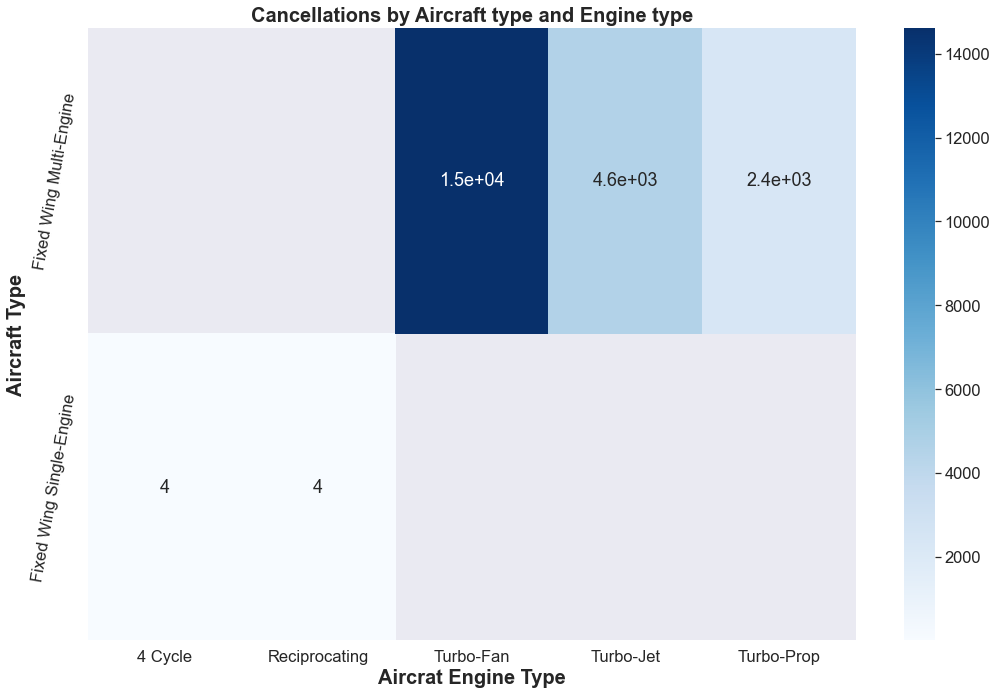

In [25]:
#Getting dataframe for flight cancelled
eng_cancelled = df_airline_plane.query('Cancelled=="1"') 

#plotting
df_heatmap = eng_cancelled.pivot_table(values='Cancelled', index='aircraft_type', columns='engine_type', aggfunc=np.sum)
plt.figure(figsize=(15,10))
sb.set(font_scale=1.5)
heat_map=sb.heatmap(df_heatmap, annot=True, cmap='Blues')
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=80)
chartLabels('Aircrat Engine Type','Aircraft Type','Cancellations by Aircraft type and Engine type')
plt.tight_layout()
plt.show()

# **Flight Delays**
> - A flight is said to be delayed when it takes more than 15 minutes to arrive/depart than expected(according to US Aviation law).
> - Delay types includes;
>> - Weather delays(actual or forecast meteorological conditions)
>> - Carrier delays(due to circumstances within the airline's control e.g. crew problem, aircraft cleaning, fueling, etc.)
>> - National air system delays(conditions such as non-extreme weather conditions, airport operations, air traffic control etc.).
>> - Security delays(security breach, long screening queues etc.)
>> - Late aircraft delays( due to late aircraft arrival, results into late departure)
> - 76% of the flights were not delayed and 25% of the flights were delayed on arrival
> - 79% of the flights were not delayed on departure while 21% were delayed.

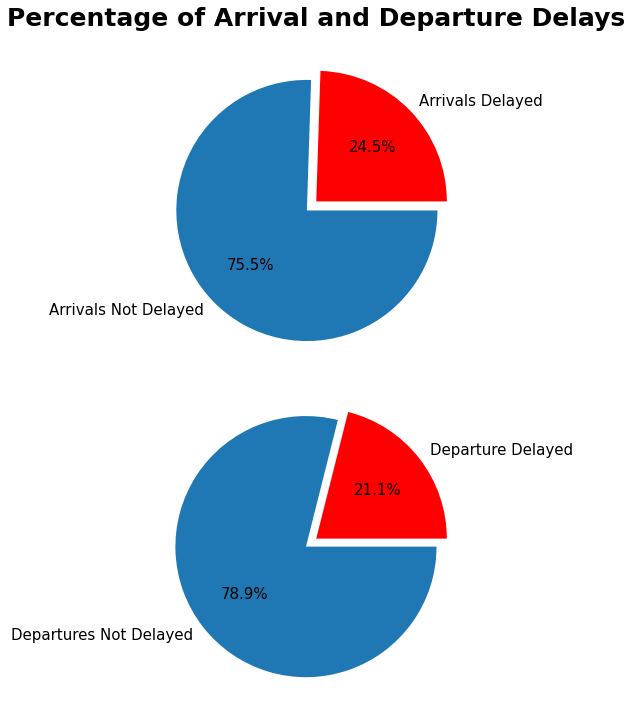

In [17]:
#Getting counts of flights delayed and not delayed on arrival
Arrival_Delayed = df_airline_plane[df_airline_plane['ArrivalDelayTime']>15].count()['ArrivalDelayTime']
Arrival_NotDelayed = df_airline_plane[df_airline_plane['ArrivalDelayTime']<15].count()['ArrivalDelayTime']

#Getting counts of flights delayed and not delayed on departure
Departure_Delayed = df_airline_plane[df_airline_plane['DepartureDelayTime']>15].count()['DepartureDelayTime']
Departure_NotDelayed = df_airline_plane[df_airline_plane['DepartureDelayTime']<15].count()['DepartureDelayTime']

#Plotting the pie charts side by side
Arrival_data_plot = [Arrival_Delayed,Arrival_NotDelayed]
label_arr = ['Arrivals Delayed','Arrivals Not Delayed']

Departure_data_plot = [Departure_Delayed,Departure_NotDelayed]
label_dep = ['Departure Delayed','Departures Not Delayed']

fig = plt.figure(figsize=(15,10))
explode = [0,0.1]
color =['r', sb.color_palette()[0]]

plt.subplot(2,1,1)
plt.pie(Arrival_data_plot, labels=label_arr, colors=color, explode=explode,autopct = '%.1f%%', textprops={'fontsize':15})
#plt.legend(loc=1,bbox_to_anchor=(1.8,1.1))


plt.subplot(2,1,2)
plt.pie(Departure_data_plot, labels=label_dep, colors=color, explode=explode,autopct = '%.1f%%', textprops={'fontsize': 15})
#plt.legend(loc=1,bbox_to_anchor=(1.8,1.1))

fig.suptitle('Percentage of Arrival and Departure Delays', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

**The bar graph shows the avaerage time for of each delay reasons** 
>- Late aircraft reason had the highest average delay time, about 22 minutes,followed by National air system delay(about 16 minutes) and carrier delay(approximately 15 minutes).
>- Security reason had the least average delay time while average delay time due to weather conditions was aabout 2.6 minutes. >- Also recall that security reasons contributed least to cancellations which could mean that security is not a threat to airline performance in the USA.

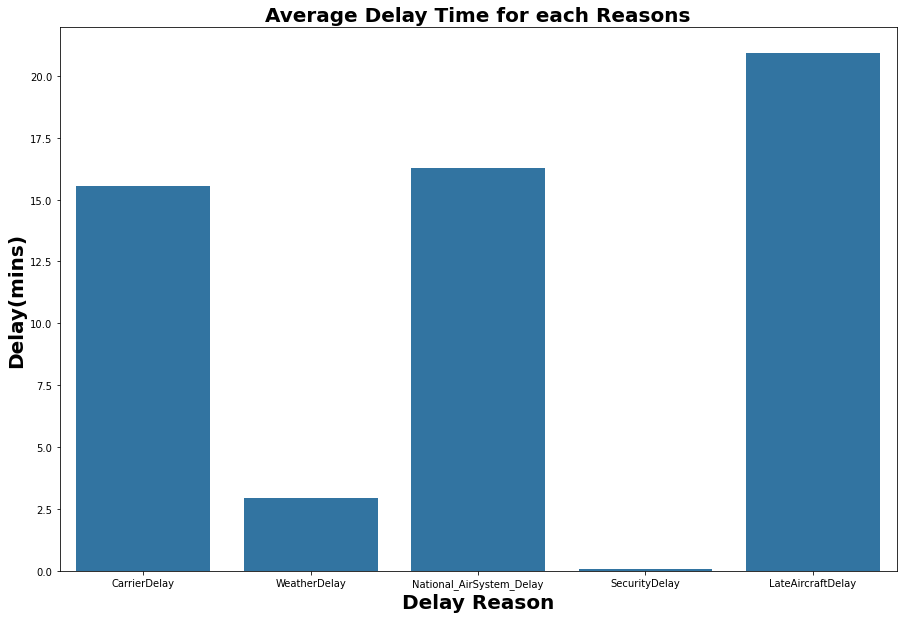

In [19]:
# query all delays and get mean values
delay_reasons = df_airline_plane[['CarrierDelay','WeatherDelay','National_AirSystem_Delay','SecurityDelay','LateAircraftDelay']].mean().rename_axis('Delay').reset_index(name = 'minutes')

fig = plt.figure(figsize=(15,10))
sb.barplot( data = delay_reasons, x ='Delay', y = 'minutes', color = base_color)
chartLabels('Delay Reason','Delay(mins)','Average Delay Time for each Reasons')

**Question: Why is the avaerage delay caused by aircraft high, could it be as a result of engine type used in the aircrafts?**

> - The violin plot shows that Turbo-prop engines contributed most to late aircraft delays just like it did for carrier and weather delays as seen in the next bar plots

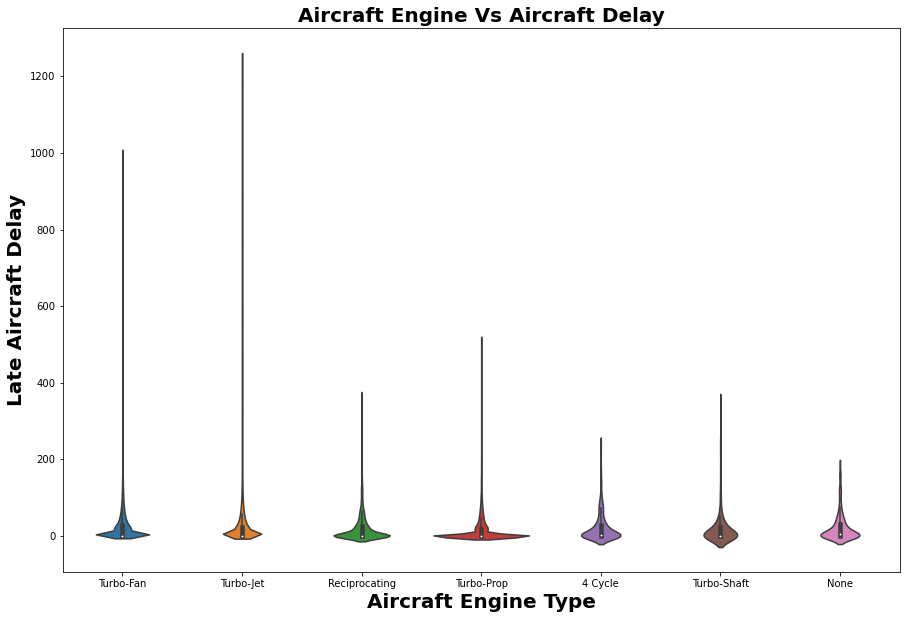

In [20]:
plt.figure(figsize=(15,10))
sb.violinplot(data=df_airline_plane, x='engine_type', y='LateAircraftDelay');
chartLabels('Aircraft Engine Type','Late Aircraft Delay','Aircraft Engine Vs Aircraft Delay')

In [21]:
#getting dataframe for engine type with their assosciated carrier and weather delays
engine = df_airline_plane.groupby('engine_type')[['CarrierDelay', 'WeatherDelay']].sum()

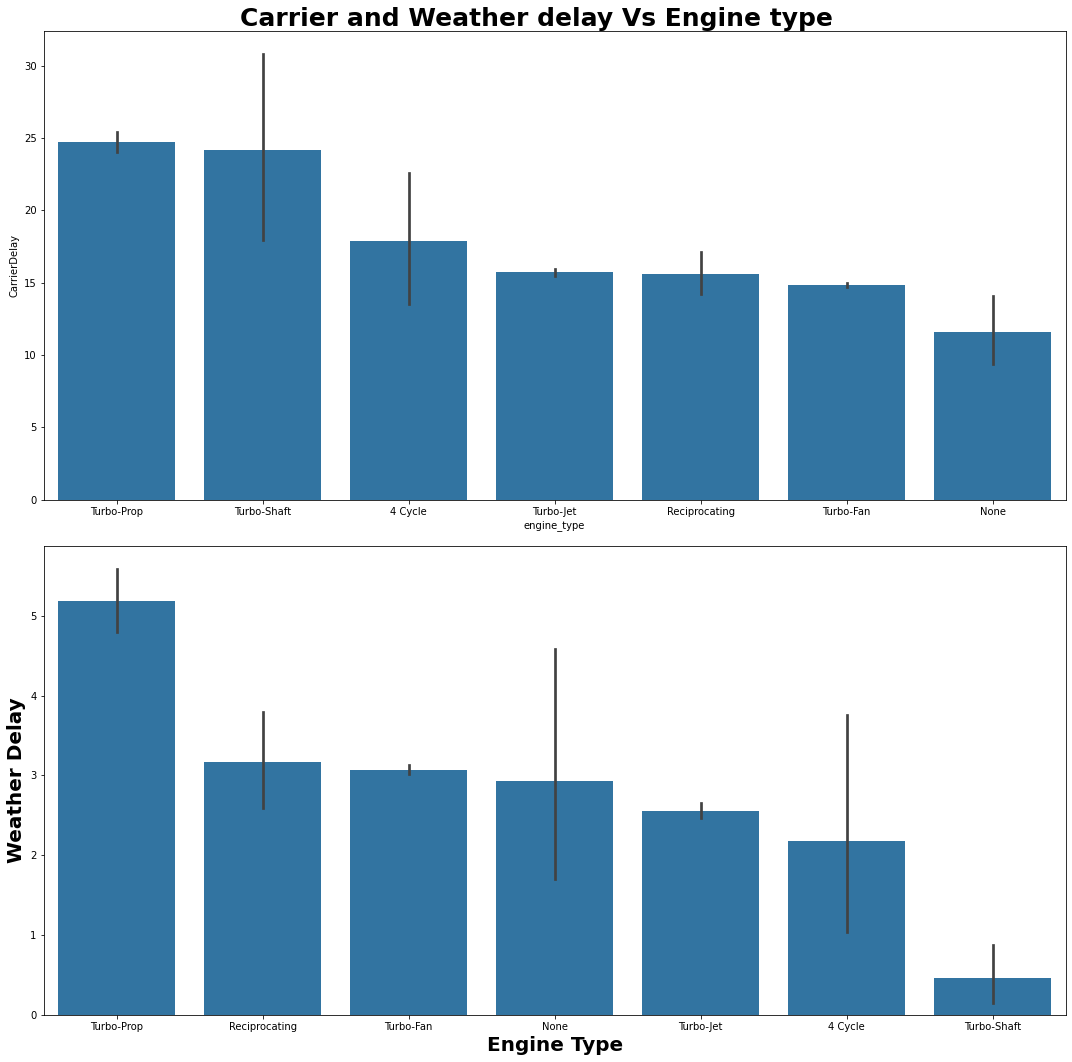

In [22]:
#getting the average number of weather and carrier delays
engine_carrier = df_airline_plane.groupby('engine_type')['CarrierDelay'].mean().sort_values(ascending=False).index
engine_weather = df_airline_plane.groupby('engine_type')['WeatherDelay'].mean().sort_values(ascending=False).index

#plotting bar plot
base_color = sb.color_palette()[0]
fig,ax = plt.subplots(2,1 , figsize=(15,15))

sb.barplot(data = df_airline_plane, x ='engine_type', y=df_airline_plane['CarrierDelay'], color = base_color, order = engine_carrier, ax=ax[0])
chartLabels('Engine Type','Weather Delay','')

sb.barplot(data = df_airline_plane, x ='engine_type', y=df_airline_plane['WeatherDelay'], color = base_color, order = engine_weather, ax=ax[1]);
chartLabels('Engine Type', 'Weather Delay','')



fig.suptitle('Carrier and Weather delay Vs Engine type', fontweight='bold', size =25);
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.show()

**This could also be a reason why few airlines/carriers uses aircraft made of Turbo-prop engines as shown in the heatmap**

In [23]:
unique_eng = df_airline_plane.groupby(['UniqueCarrier', 'engine_type']).size().reset_index(name ='count')

unique_eng = unique_eng.pivot(index ='UniqueCarrier', columns ='engine_type', values ='count')

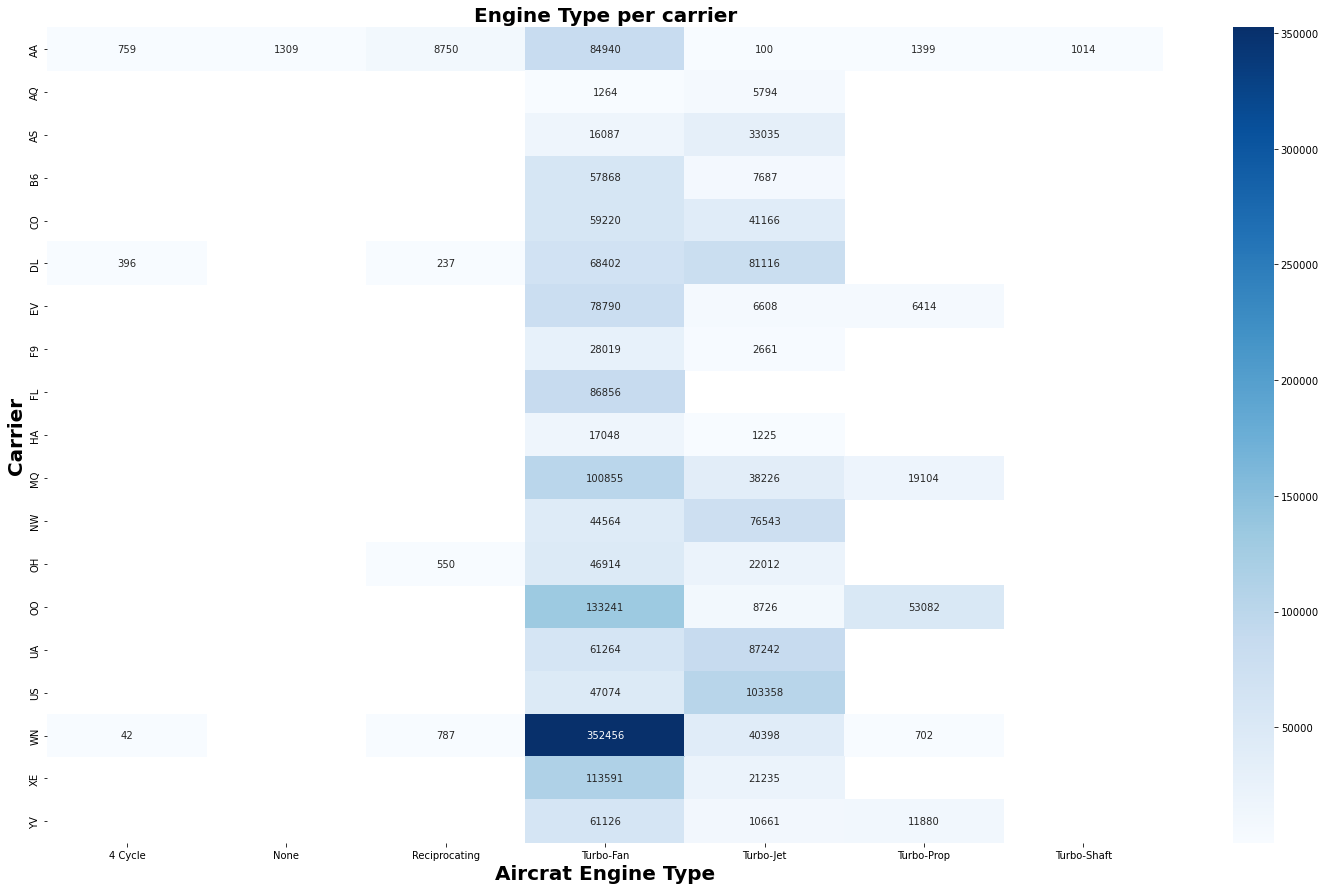

In [24]:
fig,ax = plt.subplots(figsize =(25,15))

sb.heatmap(unique_eng, annot =True, fmt ='.0f', cmap ='Blues',ax=ax)
chartLabels('Aircrat Engine Type','Carrier','Engine Type per carrier')

In summary, the cummulative monthly contributions of all the delays reasons shows that:
> - Weather and late aircraft reasons contributed most to overall delays as compared to others. 
> - Security reasons contributed least with a downward trend from February to April while national air system contributions were above security with downward trend from January to April.
> - Carrier delay times were approxiamtely consistent from January to April and higher than national air system contributions. 
> - Weather delays had steep increase from January to April while Late aircraft delays contribution increased from January to February and consistently decrease from then till April.

In [ ]:
#Changing months to ordered categorical data type
Month = ['Jan','Feb','Mar','Apr']

Month_classes = pd.api.types.CategoricalDtype(ordered=True, categories=Month)

df_airline_plane['Month'] = df_airline_plane['Month'].astype(Month_classes);

In [ ]:
#creating dataframe for each of the delay reasons monthly and determine their average delay times
carrier_delay = df_airline_plane.query('CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='CarrierDelay').sort_values(by='Month')
weather_delay = df_airline_plane.query('WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='WeatherDelay').sort_values(by='Month')
NAS_delay = df_airline_plane.query('National_AirSystem_Delay>0').groupby('Month')['National_AirSystem_Delay'].mean().reset_index(name='National_AirSystem_Delay').sort_values(by='Month')
security_delay = df_airline_plane.query('SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='SecurityDelay').sort_values(by='Month')
lateaircraft_delay = df_airline_plane.query('LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraftDelay').sort_values(by='Month')


In [ ]:
#Merging the dataframes
df1=carrier_delay.merge(weather_delay,on='Month')
df2=df1.merge(NAS_delay,on='Month')
df3=df2.merge(security_delay,on='Month')
df4=df3.merge(lateaircraft_delay,on='Month')

In [205]:
df_delay_reasons_byMonth = df4.sort_values('Month',ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

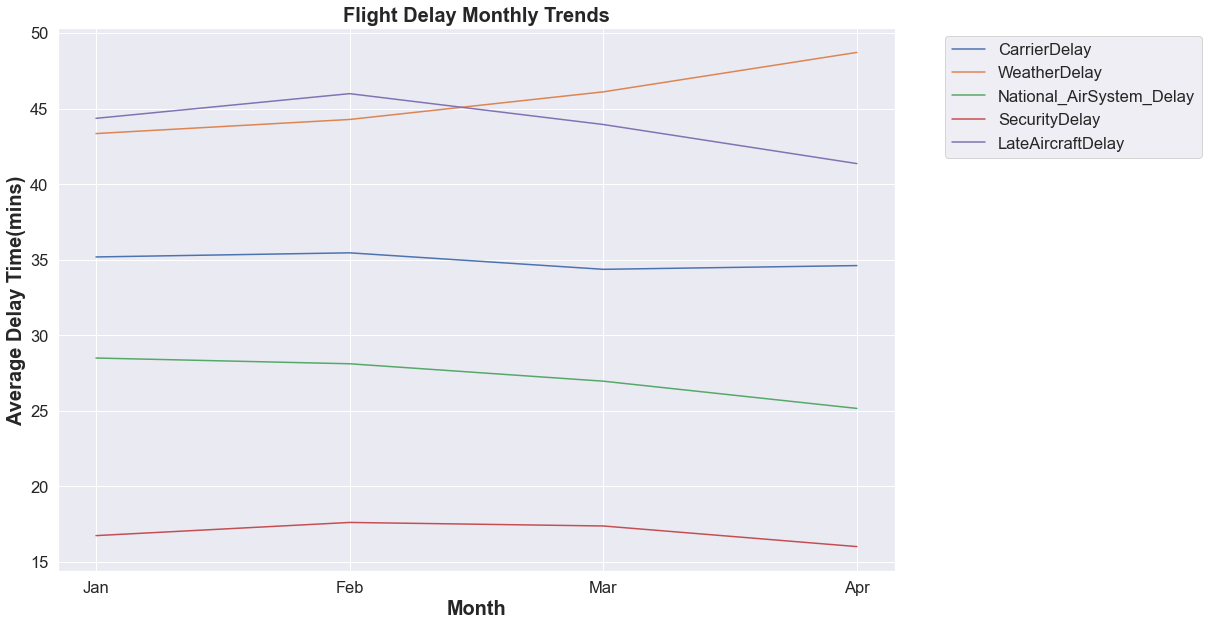

In [206]:
plt.figure(figsize=(15,10))
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.CarrierDelay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.WeatherDelay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.National_AirSystem_Delay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.SecurityDelay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.LateAircraftDelay)
plt.legend(['CarrierDelay','WeatherDelay','National_AirSystem_Delay','SecurityDelay','LateAircraftDelay'],bbox_to_anchor=(1.05,1.0))
chartLabels('Month','Average Delay Time(mins)','Flight Delay Monthly Trends')

plt.show


# **Conclusion**
The flight operations recorded a relatively low number of cancellations. Most of the flight cancellations were due to carrier issues and prevalent in Fixed wing multi-engine aircrafts with Turbo-fan,Turbo-jet and Turbo-prop engine types. Contrary to cancellations, aircraft delays on arrivals and departures were relatively  higher. Late aircraft had the highestaverage delay times was the highest, while security reason's contribution to delay was insignificant.It was also observed that high amount of delays caused by late aircraft, carrier and weather were due to the use of Turbo-Prop engines which in turn caused most unique carriers/airlines to desist from using aircrafts with such engine type.In all, weather and late aaircraft delays contributed mostly to the overall average monthly delay times from January to April 2008.

In [ ]:
jupyter nbconvert Part2_Slides_Mukhtar_Abimbola_ExplanatoryAnalysis.ipynb --to slides --post serve --no-input --no-prompt